In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets


digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
X.shape

(1797, 64)

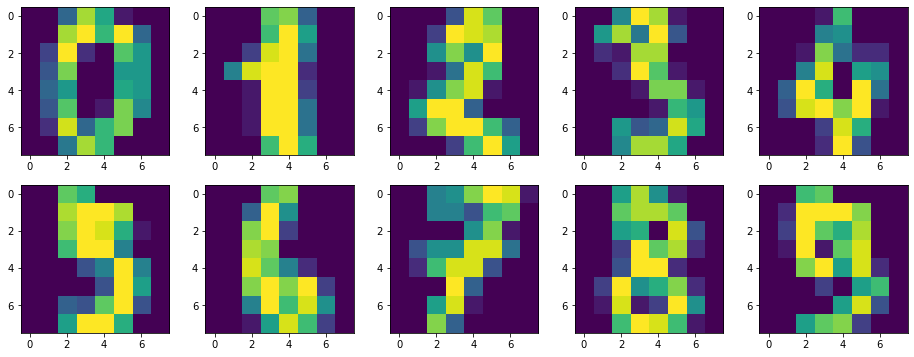

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

### train test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

X_train.shape, X_test.shape

((1437, 64), (360, 64))

## Обучение модели

In [7]:
%%time
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

CPU times: user 69.1 ms, sys: 8.21 ms, total: 77.3 ms
Wall time: 221 ms


DecisionTreeClassifier(random_state=1)

In [8]:
pred_train = model.predict(X_train)
pred_train

array([4, 9, 6, ..., 9, 1, 5])

In [9]:
train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds['true'] = y_train

train_preds

,pred,true
0,4,4
1,9,9
2,6,6
3,4,4
4,2,2
...,...,...
1432,8,8
1433,4,4
1434,9,9
1435,1,1


## Валидация

In [10]:
pred_test = model.predict(
    X_test
)

In [11]:
test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds['true'] = y_test

test_preds

,pred,true
0,1,1
1,5,5
2,0,0
3,7,7
4,1,1
...,...,...
355,4,4
356,9,9
357,4,4
358,2,2


In [12]:
from sklearn.metrics import accuracy_score

print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, pred_test)}")

Accuracy модели на обучающей выборке 1.0
Accuracy модели на тестовой выборке 0.8388888888888889


## Снижение переобучения

In [13]:
%%time
model = DecisionTreeClassifier(random_state=1,
                               min_samples_leaf=5,
                               max_depth=9)
model.fit(X_train, y_train)

CPU times: user 23.9 ms, sys: 32 µs, total: 23.9 ms
Wall time: 54.7 ms


DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, random_state=1)

In [14]:
pred_train = model.predict(X_train)

train_preds = pd.DataFrame(pred_train, columns=['pred'])
train_preds['true'] = y_train

train_preds

,pred,true
0,4,4
1,9,9
2,6,6
3,4,4
4,2,2
...,...,...
1432,8,8
1433,4,4
1434,9,9
1435,1,1


## Валидация

In [15]:
pred_test = model.predict(
    X_test
)

test_preds = pd.DataFrame(pred_test, columns=['pred'])
test_preds['true'] = y_test

test_preds

,pred,true
0,1,1
1,5,5
2,0,0
3,7,7
4,1,1
...,...,...
355,4,4
356,9,9
357,4,4
358,2,2


In [16]:
from sklearn.metrics import accuracy_score

print(f"Accuracy модели на обучающей выборке {accuracy_score(y_train, pred_train)}")
print(f"Accuracy модели на тестовой выборке {accuracy_score(y_test, pred_test)}")

Accuracy модели на обучающей выборке 0.9178844815588031
Accuracy модели на тестовой выборке 0.8527777777777777
